In [133]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

In [134]:
data = pd.read_csv('dataset/heart.csv')

In [135]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
data['ca'].value_counts()

ca
0    465
1    177
2     95
3     52
4     14
Name: count, dtype: int64

In [137]:
# Count the number of occurrences of each unique value in 'thal' column
thal_counts = data['thal'].value_counts()

# Display the counts of unique values in the 'thal' column
print(thal_counts)


thal
2    442
3    315
1     41
0      5
Name: count, dtype: int64


In [138]:
# Check rows where thal = 3 and target = 1
normal_cases = data[(data['thal'] == 3) & (data['target'] == 1)]
print(normal_cases)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
20    59    1   0       135   234    0        1      161      0      0.5   
24    40    1   3       140   199    0        1      178      1      1.4   
31    65    1   0       120   177    0        1      140      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
794   52    1   3       152   298    1        1      178      0      1.2   
796   67    0   2       115   564    0        0      160      0      1.6   
797   68    1   2       118   277    0        1      151      0      1.0   
798   46    1   1       101   197    1        1      156      0      0.0   
802   57    1   0       132   207    0        1      168      1      0.0   

     slope  ca  thal  target  
7        2   0     3       1  
8        2   0     3     

In [139]:
data['thal'].unique()

array([1, 2, 3, 0])

In [140]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [141]:
data_dup = data.duplicated().any()
if data_dup:
    print("There are duplicate rows in the dataset.")
else:
    print("No duplicate rows found.")

There are duplicate rows in the dataset.


In [142]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()

In [143]:
data_dup

np.False_

###  Data Processing

In [144]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [145]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [146]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Visualizing and Encoding Categorical Data

<Axes: xlabel='age', ylabel='Density'>

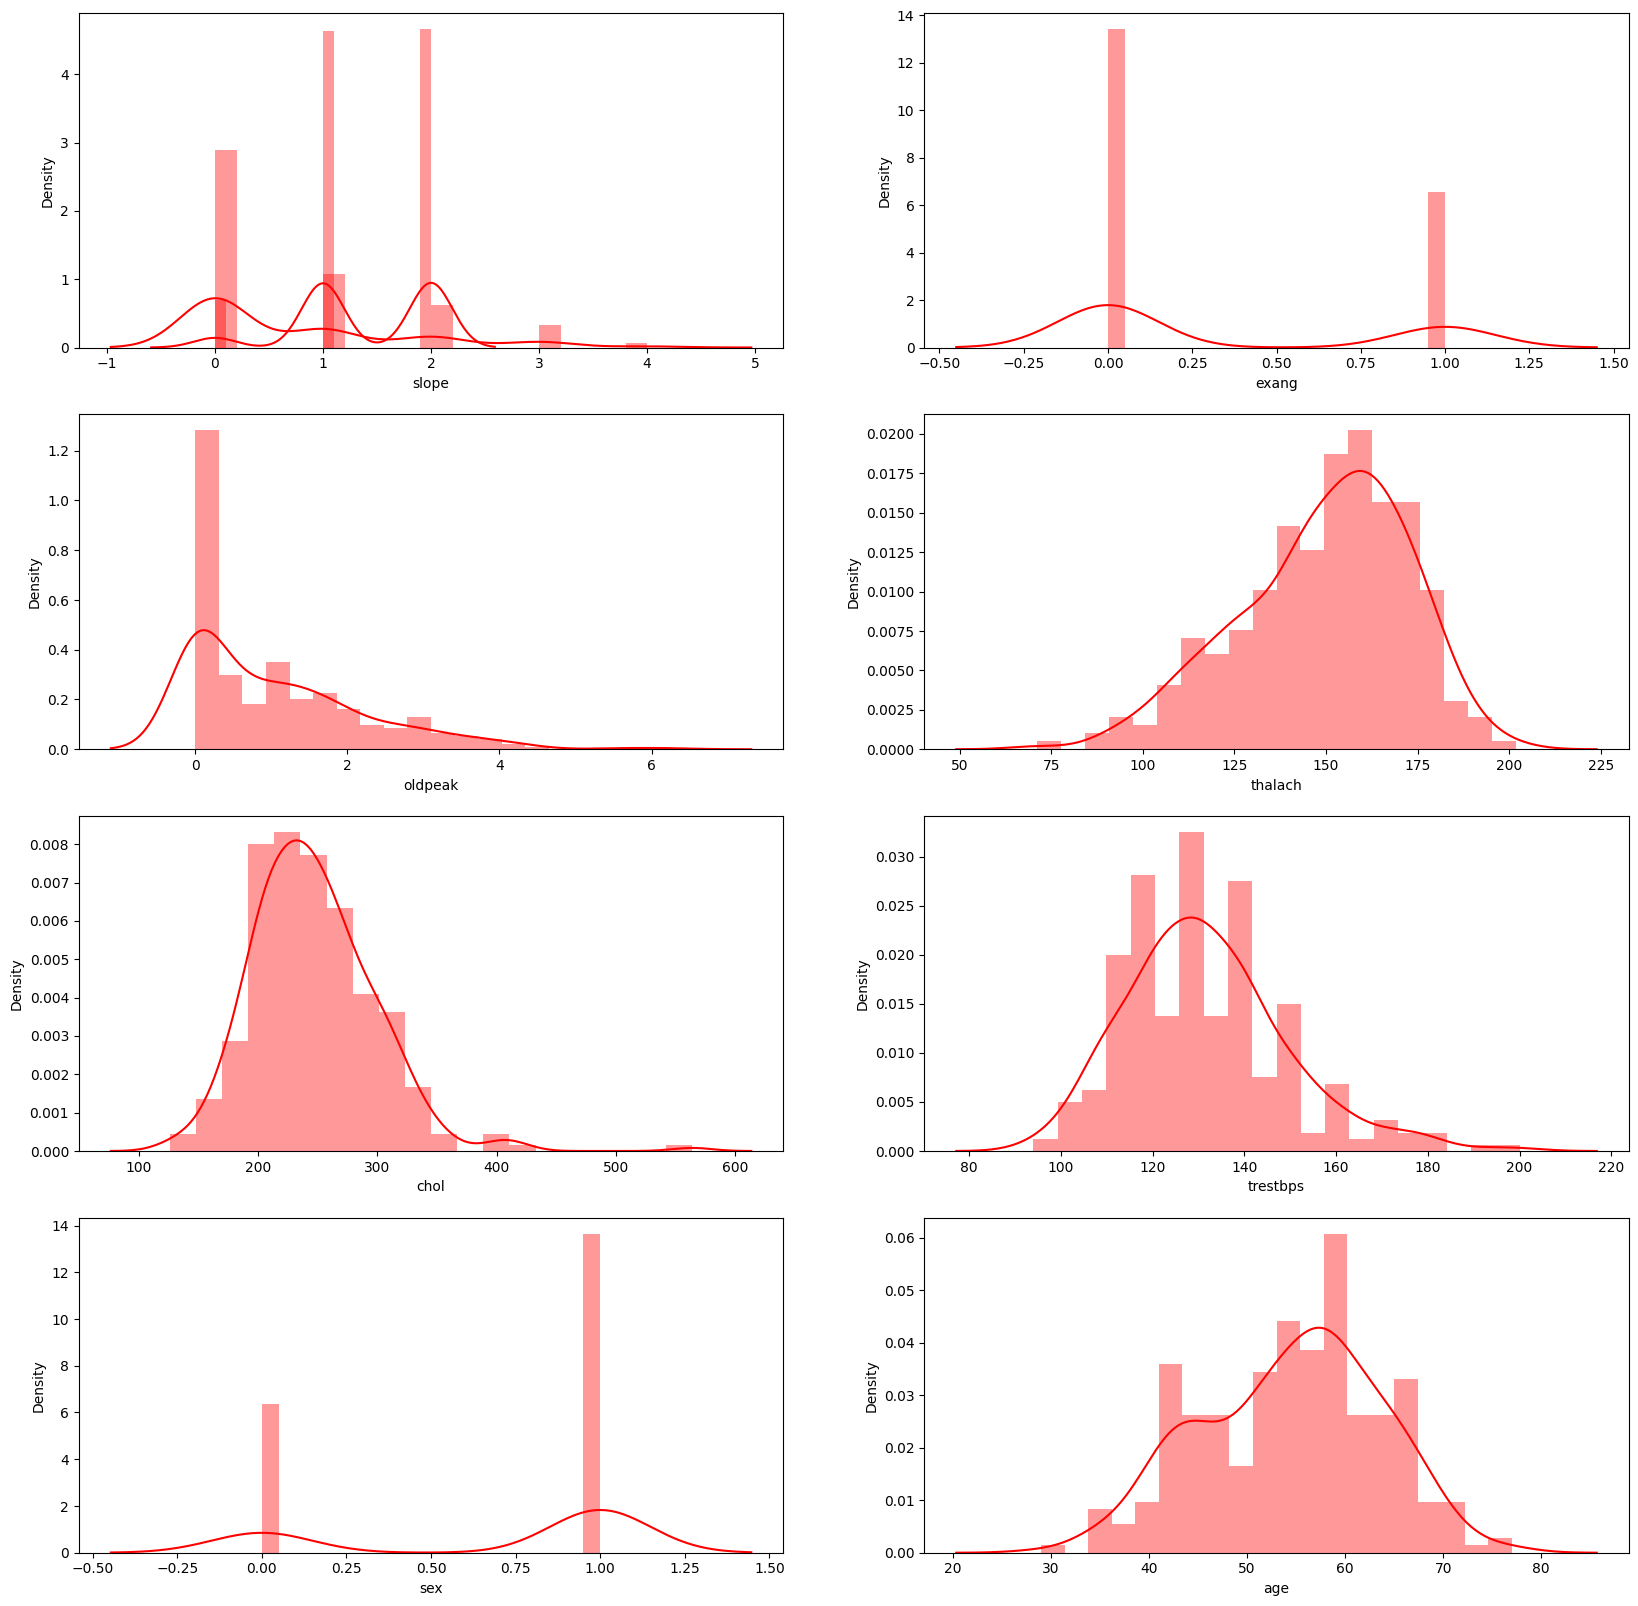

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,2, figsize=(20,20))

sns.distplot(data.ca, bins=20, ax=ax[0,0], color="red")
sns.distplot(data.slope, bins=20, ax=ax[0,0], color="red")
sns.distplot(data.exang, bins=20, ax=ax[0,1], color="red")
sns.distplot(data.oldpeak, bins=20, ax=ax[1,0], color="red")
sns.distplot(data.thalach, bins=20, ax=ax[1,1], color="red")
sns.distplot(data.chol, bins=20, ax=ax[2,0], color="red")
sns.distplot(data.trestbps, bins=20, ax=ax[2,1], color="red")
sns.distplot(data.sex, bins=20, ax=ax[3,0], color="red")
sns.distplot(data.age, bins=20, ax=ax[3,1], color="red")

In [148]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


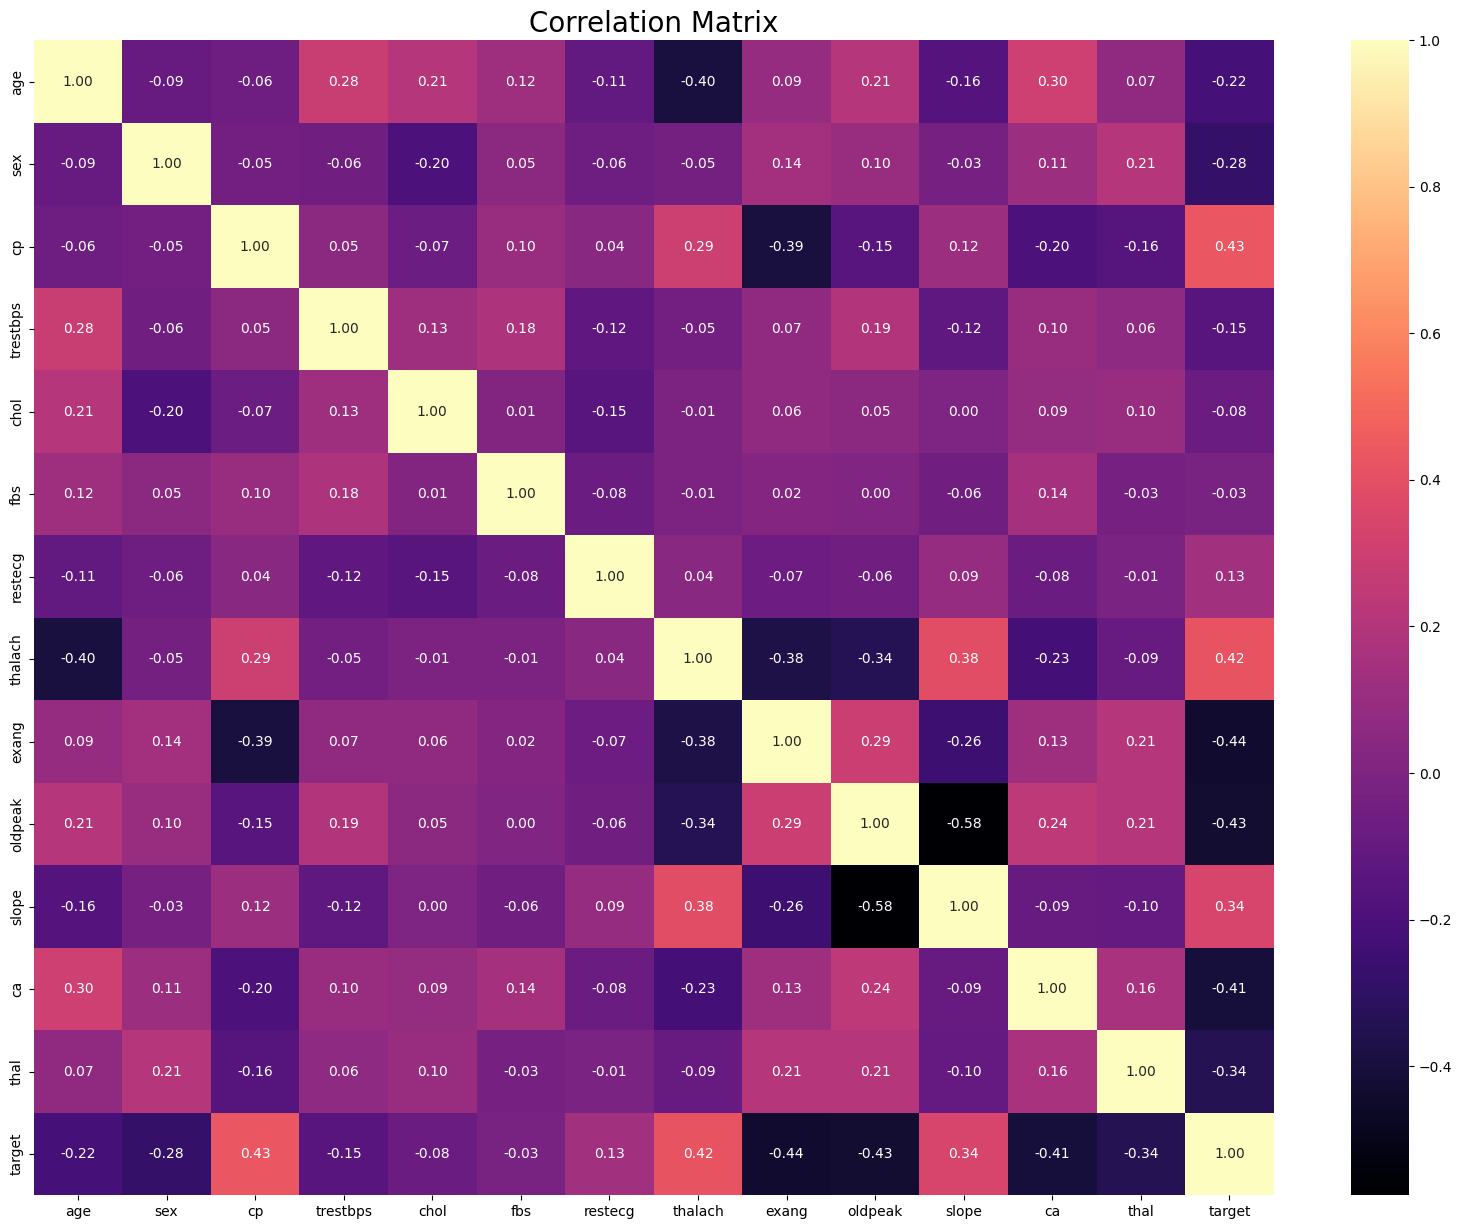

In [149]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [150]:
data['cp'].unique()

array([3, 2, 1, 0])

In [151]:
data['exang'].unique()

array([0, 1])

In [152]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [153]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [154]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [155]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


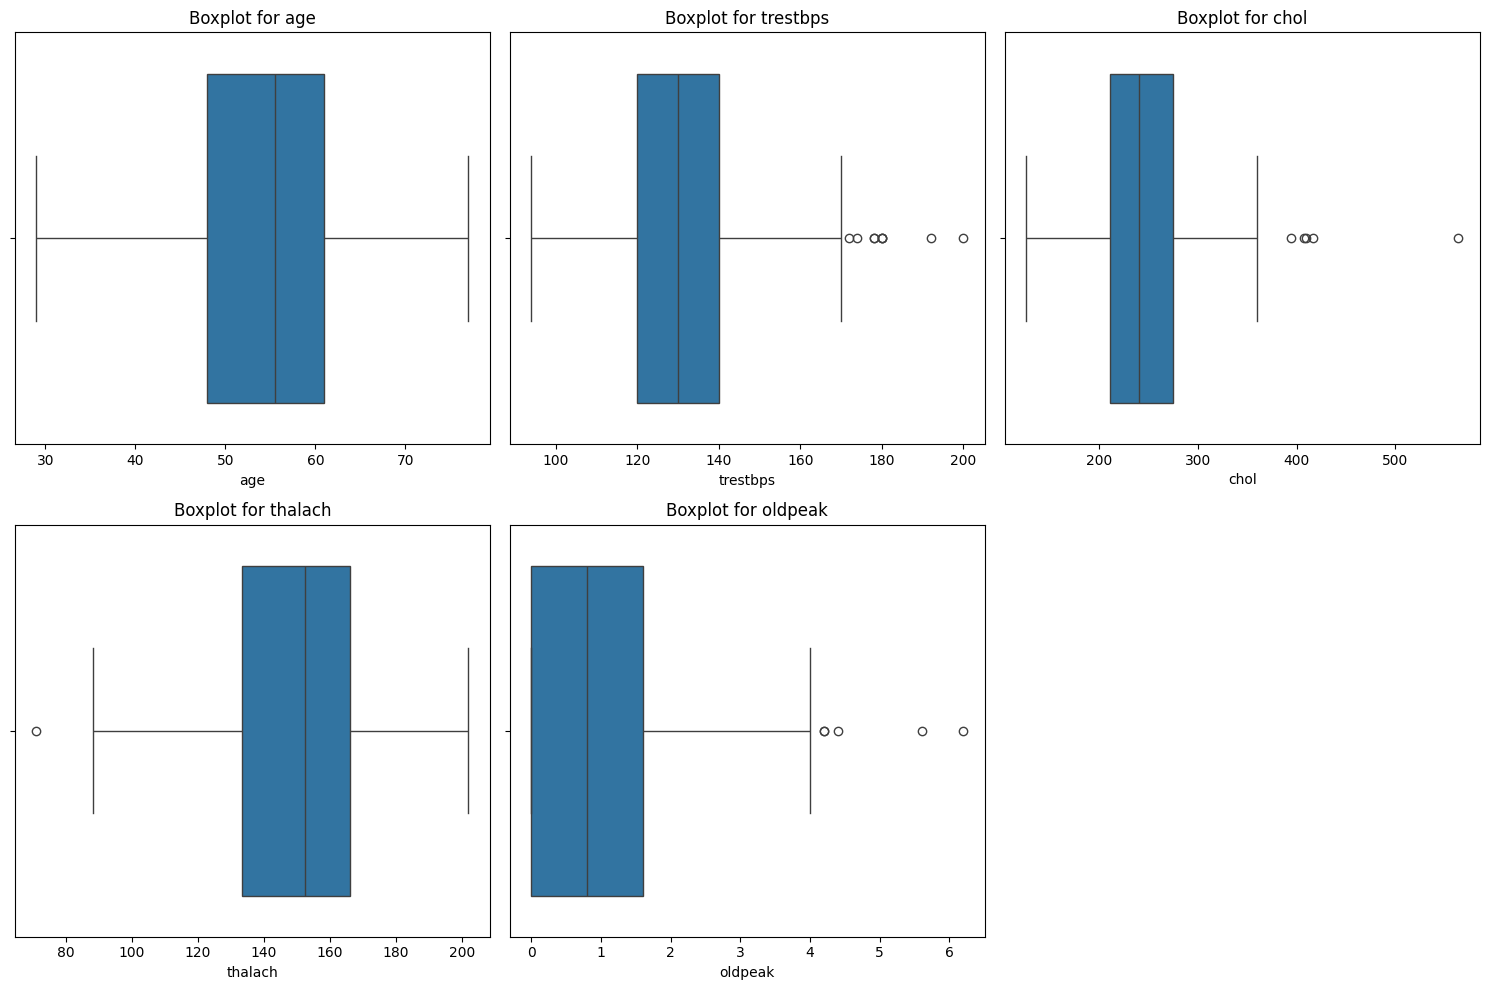

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of subplots based on the number of continuous columns
num_columns = len(cont_val)  # Number of continuous columns
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed (3 columns per row)

# Set up the matplotlib figure with dynamic subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Flatten the axes array so we can iterate over it easily
axes = axes.flatten()

# Plot each continuous feature
for i, col in enumerate(cont_val):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Remove any empty subplots (in case num_columns is not a multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Turn off any unused subplots

plt.tight_layout()  # Adjust the layout to make it look clean
plt.show()


In [157]:
# List of continuous columns where we want to detect outliers
outlier_columns = ['trestbps', 'chol', 'oldpeak']

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[outlier_columns].quantile(0.25)
Q3 = data[outlier_columns].quantile(0.75)

# Step 2: Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1


In [158]:
# Step 2: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [159]:
# Step 3: Remove rows where any value in the specified columns is an outlier
data_cleaned = data[~((data[outlier_columns] < lower_bound) | (data[outlier_columns] > upper_bound)).any(axis=1)]

# Check how many rows were removed
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_cleaned.shape}")


Original data shape: (302, 23)
Data shape after removing outliers: (284, 23)


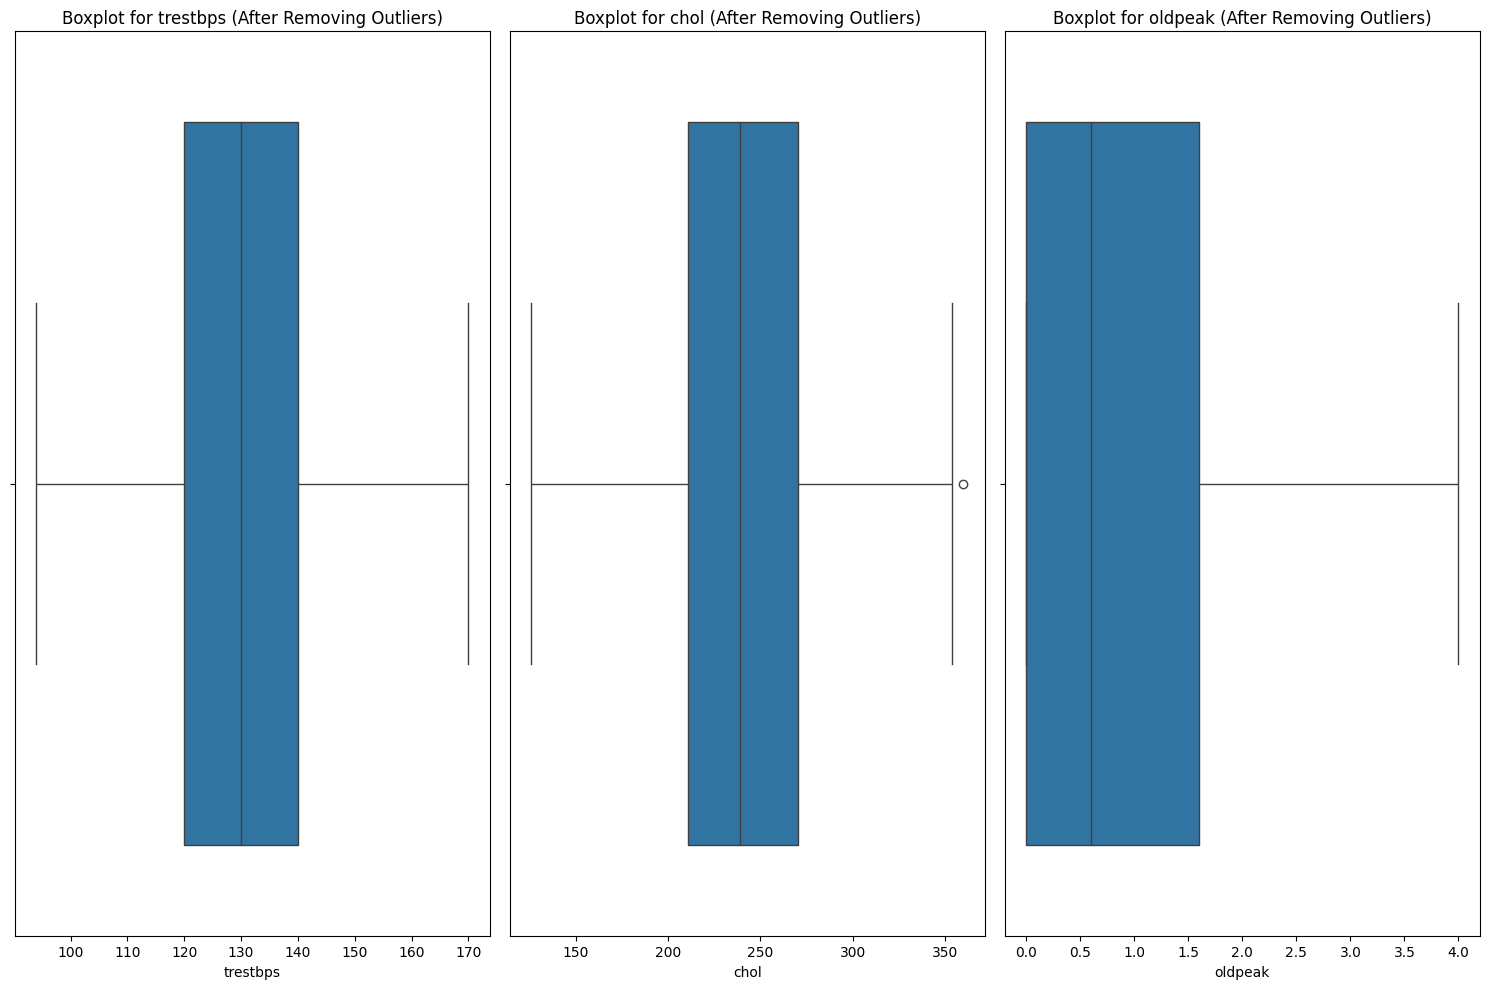

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to see the data after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_columns):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns of subplots
    sns.boxplot(data=data_cleaned, x=col)
    plt.title(f'Boxplot for {col} (After Removing Outliers)')

plt.tight_layout()
plt.show()


In [161]:
data_cleaned


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,0,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,1,110,264,132,1.2,0,False,False,True,...,False,True,False,False,False,False,False,False,False,True
300,68,1,144,193,141,3.4,0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,1,130,131,115,1.2,0,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [162]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data_cleaned[cont_val] = st.fit_transform(data_cleaned[cont_val])


In [163]:
# Impact of Standardization:
# For example, consider two features in your dataset:

# age: Values might range from 20 to 70.
# chol: Values might range from 150 to 350.
# Without standardization, the model might give more importance to chol simply because its values are larger in magnitude compared to age.
#After standardization, both features are on the same scale, making it easier for the model to treat them equally.

In [164]:
data_cleaned.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.975532,1,0.987404,-0.208904,0.013724,1.317861,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.872760,1,0.009867,0.173137,1.616132,2.491129,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.434561,0,0.009867,-0.860622,0.966507,0.437910,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.208684,1,-0.641824,-0.141485,1.226357,-0.148724,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.318234,0,-0.641824,2.510332,0.576732,-0.344269,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


###  Train and Test Split

In [165]:
# X = data.drop('target',axis=1)
# y = data['target']

X = data_cleaned.drop('target',axis=1)
y = data_cleaned['target']

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)
                                               

In [167]:
y_test

10     1
271    0
163    1
218    0
77     1
245    0
281    0
177    0
44     1
237    0
48     1
284    0
149    1
175    0
5      1
229    0
243    0
146    1
160    1
35     1
115    1
62     1
70     1
230    0
58     1
97     1
79     1
294    0
290    0
114    1
264    0
165    0
174    0
47     1
81     1
217    0
68     1
84     1
186    0
193    0
32     1
23     1
25     1
138    1
75     1
211    0
236    0
262    0
93     1
212    0
279    0
182    0
95     1
6      1
132    1
272    0
301    0
Name: target, dtype: int64

###  Logistic Regression

In [168]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [169]:
print(type(X_train))  
print(X_train.dtypes)  


print(type(y_train))  
print(y_train.dtype)  


<class 'pandas.core.frame.DataFrame'>
age          float64
sex            int64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
cp_1            bool
cp_2            bool
cp_3            bool
fbs_1           bool
restecg_1       bool
restecg_2       bool
exang_1         bool
slope_1         bool
slope_2         bool
ca_1            bool
ca_2            bool
ca_3            bool
ca_4            bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object
<class 'pandas.core.series.Series'>
int64


In [170]:
### MACHINE_LEARNING MODELS Training

In [199]:
import numpy as np
import pandas as pd

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        # Ensure X and y are NumPy arrays
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        y = np.array(y) if not isinstance(y, np.ndarray) else y
        y = y.ravel()  # Ensure y is 1D

        # Initialize weights randomly
        self.weights = np.random.randn(X.shape[1]) * 0.01  # Small random values

        # Gradient Descent
        for _ in range(self.epochs):
            z = np.dot(X, self.weights)
            predictions = self.sigmoid(z)
            errors = predictions - y
            gradient = np.dot(X.T, errors) / len(y)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        z = np.dot(X, self.weights)
        return np.round(self.sigmoid(z))

    def sigmoid(self, x):
        # Ensure x is a numpy array or a scalar that np.exp() can handle
        x = np.array(x) if not isinstance(x, np.ndarray) else x
        return 1 / (1 + np.exp(-x))  # This should handle scalar and array inputs

# SVM Model
class SVM:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        # Initialize weights
        self.weights = np.zeros(X.shape[1])
        
        # Gradient Descent
        for _ in range(self.epochs):
            for i in range(len(X)):
                if y[i] * np.dot(X[i], self.weights) < 1:
                    self.weights -= self.learning_rate * (2 * self.weights - np.dot(X[i], y[i]))
                else:
                    self.weights -= self.learning_rate * 2 * self.weights

    def predict(self, X):
        return np.sign(np.dot(X, self.weights))

class RandomForestClassifier:
    def __init__(self, n_estimators=10, max_depth=5):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Randomly sample with replacement
            sample_X, sample_y = self.bootstrap_sample(X, y)
            tree = self.build_tree(sample_X, sample_y)
            self.trees.append(tree)

    def bootstrap_sample(self, X, y):
        indices = np.random.choice(len(X), len(X), replace=True)
        return X[indices], y[indices]

    def build_tree(self, X, y, depth=0):
        # Stop if max depth is reached or all labels are the same
        if depth >= self.max_depth or len(set(y)) == 1:
            return np.mean(y)

        # Find the best split based on Information Gain
        best_ig, best_split = float('-inf'), None
        for feature_index in range(X.shape[1]):
            # Find all unique values for the feature
            feature_values = np.unique(X[:, feature_index])
            for value in feature_values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]
                
                # Skip if split doesn't result in both left and right groups
                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                # Compute Information Gain for the split
                ig = self.calculate_information_gain(y, left_y, right_y)
                if ig > best_ig:
                    best_ig = ig
                    best_split = (feature_index, value)

        if best_split is None:
            return np.mean(y)

        feature_index, value = best_split
        left_mask = X[:, feature_index] <= value
        right_mask = ~left_mask
        left_tree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        return (feature_index, value, left_tree, right_tree)

    def calculate_entropy(self, y):
        class_counts = np.bincount(y.astype(int))
        probabilities = class_counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Add epsilon to avoid log(0)

    def calculate_information_gain(self, y, left_y, right_y):
        # Entropy of the parent node
        entropy_before = self.calculate_entropy(y)
        
        # Entropy of the left and right child nodes
        entropy_left = self.calculate_entropy(left_y)
        entropy_right = self.calculate_entropy(right_y)
        
        # Weighted average entropy of the children
        weighted_entropy = (len(left_y) / len(y)) * entropy_left + (len(right_y) / len(y)) * entropy_right
        
        # Information Gain is the reduction in entropy
        return entropy_before - weighted_entropy

    def predict(self, X):
        predictions = np.array([self._predict_tree(tree, X) for tree in self.trees])
        return np.round(np.mean(predictions, axis=0))

    def _predict_tree(self, tree, X):
        if isinstance(tree, (int, float)):
            return tree
        feature_index, value, left_tree, right_tree = tree
        if X[feature_index] <= value:
            return self._predict_tree(left_tree, X)
        else:
            return self._predict_tree(right_tree, X)


In [122]:
# Convert boolean columns to 0/1 (True to 1, False to 0)
X = data_cleaned.drop('target', axis=1)

# Check the columns that are boolean
bool_columns = X.select_dtypes(include=['bool']).columns
print("Boolean columns:", bool_columns)

# Convert boolean columns to integers (True to 1, False to 0)
X[bool_columns] = X[bool_columns].astype(int)

# Ensure the target variable is numeric (if necessary)
y = data_cleaned['target']
y = y.astype(int)

# Check the data types after conversion
print(X.dtypes)

# Proceed with LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)  # or use 'saga'
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X)  # You can use X_test for testing

print(type(X_train))  
print(X_train.dtypes)  

print(type(y_train))  
print(y_train.dtype)  


Boolean columns: Index(['cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')
age          float64
sex            int64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
cp_1           int64
cp_2           int64
cp_3           int64
fbs_1          int64
restecg_1      int64
restecg_2      int64
exang_1        int64
slope_1        int64
slope_2        int64
ca_1           int64
ca_2           int64
ca_3           int64
ca_4           int64
thal_1         int64
thal_2         int64
thal_3         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
age          float64
sex            int64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
cp_1            bool
cp_2            bool
cp_3            bool
fbs_1           bool
restecg_1       bool
restecg_2       bool
exang_1         boo

### Model Training

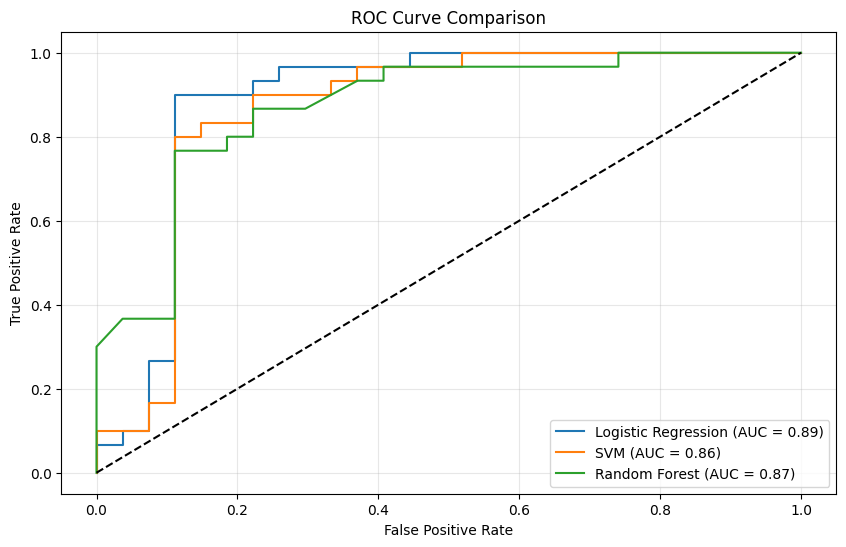

                 Model  Accuracy  F1 Score  Precision    Recall       AUC
0  Logistic Regression  0.877193  0.881356   0.896552  0.866667  0.885185
1                  SVM  0.842105  0.847458   0.862069  0.833333  0.864198
2        Random Forest  0.807018  0.807018   0.851852  0.766667  0.872840


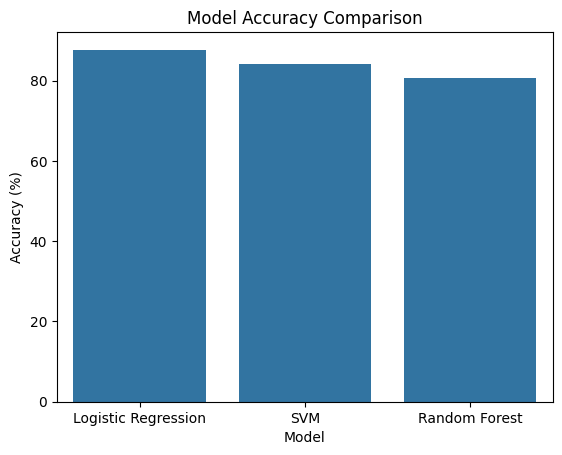

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)


# Logistic Regression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)
y_proba1 = log.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# SVM
svm_model = svm.SVC(probability=True)  # Enable probability=True for AUC calculation
svm_model.fit(X_train, y_train)
y_pred2 = svm_model.predict(X_test)
y_proba2 = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred3 = rf_model.predict(X_test)
y_proba3 = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Calculate AUC scores
auc1 = roc_auc_score(y_test, y_proba1)
auc2 = roc_auc_score(y_test, y_proba2)
auc3 = roc_auc_score(y_test, y_proba3)

# Generate ROC curves
fpr1, tpr1, _ = roc_curve(y_test, y_proba1)
fpr2, tpr2, _ = roc_curve(y_test, y_proba2)
fpr3, tpr3, _ = roc_curve(y_test, y_proba3)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label=f"Logistic Regression (AUC = {auc1:.2f})")
plt.plot(fpr2, tpr2, label=f"SVM (AUC = {auc2:.2f})")
plt.plot(fpr3, tpr3, label=f"Random Forest (AUC = {auc3:.2f})")

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Add AUC to metrics
metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
    ],
    'F1 Score': [
        f1_score(y_test, y_pred1),
        f1_score(y_test, y_pred2),
        f1_score(y_test, y_pred3),
    ],
    'Precision': [
        precision_score(y_test, y_pred1),
        precision_score(y_test, y_pred2),
        precision_score(y_test, y_pred3),
    ],
    'Recall': [
        recall_score(y_test, y_pred1),
        recall_score(y_test, y_pred2),
        recall_score(y_test, y_pred3),
    ],
    'AUC': [auc1, auc2, auc3],
}
metrics_df = pd.DataFrame(metrics)

# Print metrics DataFrame
print(metrics_df)

# Bar chart for accuracy comparison
sns.barplot(x=metrics_df['Model'], y=metrics_df['Accuracy'] * 100)  # Multiply by 100 for percentage
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()


In [97]:
y_pred1 = log.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred1)

0.8771929824561403

In [99]:
y_pred2 = svm_model.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred2)

0.8421052631578947

In [101]:
y_pred3= rf_model.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred3)

0.8245614035087719

In [95]:
final_data = pd.DataFrame({'Models':['LR','SVM','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100]})

In [96]:
final_data

,Models,ACC
0,LR,87.719298
1,SVM,84.210526
2,RF,82.456140


                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.877193  0.881356   0.896552  0.866667
1                  SVM  0.842105  0.847458   0.862069  0.833333
2        Random Forest  0.824561  0.827586   0.857143  0.800000
Confusion Matrix for SVM:
[[23  4]
 [ 5 25]]
Confusion Matrix for Random Forest:
[[23  4]
 [ 6 24]]


<Axes: xlabel='Model', ylabel='Accuracy'>

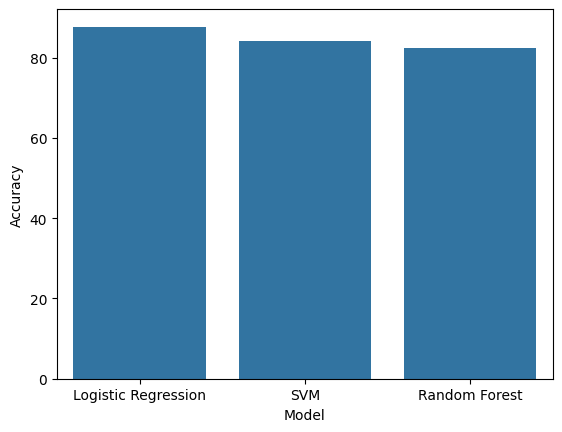

In [176]:
# Calculate accuracy, F1, precision, recall for all models
metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3)],
    'F1 Score': [f1_score(y_test, y_pred1), f1_score(y_test, y_pred2), f1_score(y_test, y_pred3)],
    'Precision': [precision_score(y_test, y_pred1), precision_score(y_test, y_pred2), precision_score(y_test, y_pred3)],
    'Recall': [recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)],
}
# Create a DataFrame to display the results
metrics_df = pd.DataFrame(metrics)

# Print the metrics
print(metrics_df)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix for SVM:")
print(cm_svm)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Plot bar chart for accuracy comparison
sns.barplot(x=metrics_df['Model'], y=metrics_df['Accuracy']*100)  # Multiply by 100 for percentage


In [198]:
# import pandas as pd
# import seaborn as sns
# from sklearn.linear_model import LogisticRegression
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# # Logistic Regression
# log = LogisticRegression()
# log.fit(X_train, y_train)
# y_pred1 = log.predict(X_test)

# # SVM
# svm_model = svm.SVC()
# svm_model.fit(X_train, y_train)
# y_pred2 = svm_model.predict(X_test)

# # Random Forest Classifier
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# y_pred3 = rf_model.predict(X_test)



# # Confusion Matrix for SVM
# cm_svm = confusion_matrix(y_test, y_pred2)
# print("Confusion Matrix for SVM:")
# print(cm_svm)

# # Confusion Matrix for Random Forest
# cm_rf = confusion_matrix(y_test, y_pred3)
# print("Confusion Matrix for Random Forest:")
# print(cm_rf)

# # Plot bar chart for accuracy comparison
# sns.barplot(x=metrics_df['Model'], y=metrics_df['Accuracy']*100)  # Multiply by 100 for percentage


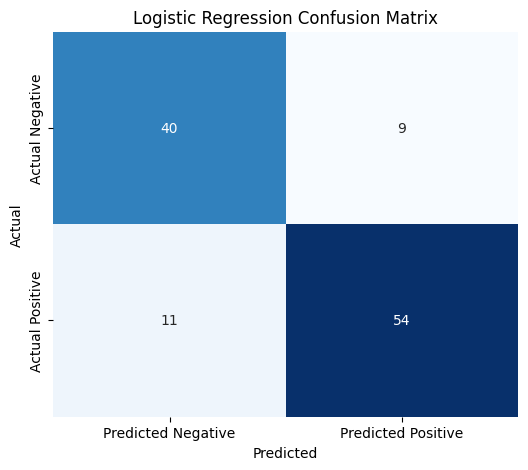

In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred1)

# Plotting Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


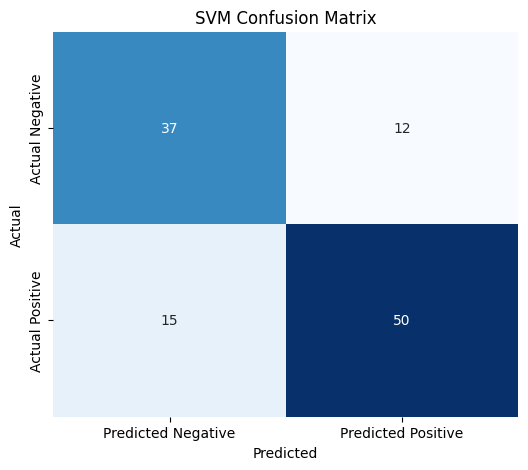

In [185]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred2)

# Plotting SVM Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


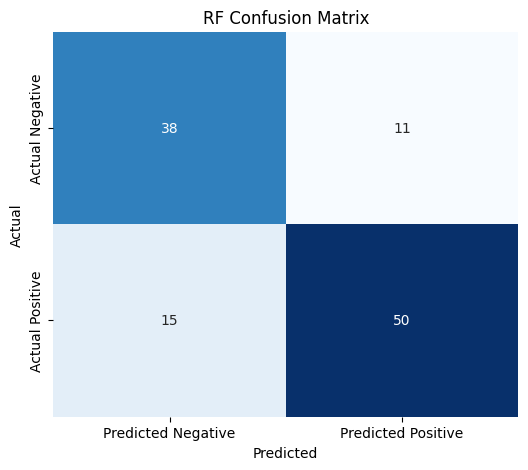

In [186]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred3)

# Plotting RF Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [93]:
final_data = pd.DataFrame({'Models':['LR','SVM','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100]})

In [94]:
final_data

,Models,ACC
0,LR,87.719298
1,SVM,84.210526
2,RF,82.456140


In [51]:
import seaborn as sns

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])


In [ ]:
from sklearn.svm import SVC
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)



In [ ]:
from sklearn.svm import SVC

# When creating your SVM model, set probability=True
svm_model = SVC(probability=True)

# Train your model as usual
svm_model.fit(X_train, y_train)

# Now, you should be able to use predict_proba
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]


In [ ]:
# Import necessary libraries for ROC and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities for each model
y_prob_log = log_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Step 2: Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Step 3: Plot ROC curve for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot the random classifier line (diagonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Predicted probabilities for Logistic Regression
y_prob_log = log_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Predicted probabilities for SVM
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Predicted probabilities for Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


###  Save Model Using Joblib

In [132]:
import joblib

In [191]:
saved_columns = X_train.columns.tolist() 

In [192]:
saved_columns

['age',
 'sex',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_1',
 'thal_2',
 'thal_3']

In [194]:
joblib.dump(log_model, 'logistic_regression_model.joblib')
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(rf_model, 'rf_model.joblib')
joblib.dump(st, 'scaler.joblib')
joblib.dump(saved_columns, 'saved_columns.joblib')

In [190]:
log_model = joblib.load('logistic_regression_model.joblib')
svm_model = joblib.load('svm_model.joblib')
rf_model = joblib.load('rf_model.joblib')
scaler = joblib.load('scaler.joblib')
saved_columns = joblib.load('saved_columns.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'logistic_regression_model.joblib'

In [ ]:
### Prediction on New Data

In [ ]:
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3],
})

# Step 1: Apply one-hot encoding to the new data (but do not scale categorical features)
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Step 2: Print columns of both datasets for comparison
# Assuming saved_columns contains the correct order of columns your model was trained on
print("Columns in saved_columns:", saved_columns)
print("Columns in new_data_encoded before alignment:", new_data_encoded.columns)

# Step 3: Identify missing columns (i.e., columns that exist in saved_columns but not in new_data_encoded)
missing_cols = set(saved_columns) - set(new_data_encoded.columns)
print(f"Missing columns: {missing_cols}")

# Step 4: Add missing columns to the new data (with default value 0)
for col in missing_cols:
    new_data_encoded[col] = 0  # Add missing columns with value 0

# Step 5: Reorder columns of the new data to match the order in saved_columns
new_data_encoded = new_data_encoded[saved_columns]

# Step 6: Scale only the continuous columns
# Define the continuous columns (based on training data)
cont_val = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Apply scaling to the continuous features (ensure you're using the same scaler used during training)
new_data_encoded[cont_val] = scaler.transform(new_data_encoded[cont_val])

# Step 7: Make a prediction using the trained Logistic Regression model
log_pred = log_model.predict(new_data_encoded)

# Step 8: Output the prediction
print(f"Prediction: {'Disease' if log_pred[0] == 1 else 'No Disease'}")

In [ ]:
new_data

In [ ]:
# Print out the columns of both the new data and training data to debug
print("Columns in new data:", new_data.columns)
print("Columns in training data:", X_train.columns)


In [ ]:
data.tail()

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report


# Load the trained model and scaler
log_model = joblib.load('logistic_regression_model.joblib')
scaler = joblib.load('scaler.joblib')

# Apply one-hot encoding to both X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the columns of X_test match the columns of X_train
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0  # Add missing columns with value 0

# Ensure that the columns are in the same order as the training data
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Apply scaling to both X_train and X_test (using the same scaler)
X_train_encoded[cont_val] = scaler.transform(X_train_encoded[cont_val])
X_test_encoded[cont_val] = scaler.transform(X_test_encoded[cont_val])

# Step 1: Evaluate on Training Data
train_pred = log_model.predict(X_train_encoded)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Accuracy on the training data: {train_accuracy:.4f}")
print(f"Classification Report on Training Data:\n{classification_report(y_train, train_pred)}")

# Step 2: Evaluate on Test Data
test_pred = log_model.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy on the test data: {test_accuracy:.4f}")
print(f"Classification Report on Test Data:\n{classification_report(y_test, test_pred)}")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report


# Load the trained Random Forest model and scaler
rf_model = joblib.load('rf_model.joblib')
scaler = joblib.load('scaler.joblib')

# Apply one-hot encoding to both X_train and X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the columns of X_test match the columns of X_train
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0  # Add missing columns with value 0

# Ensure that the columns are in the same order as the training data
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Apply scaling to both X_train and X_test (using the same scaler)
X_train_encoded[cont_val] = scaler.transform(X_train_encoded[cont_val])
X_test_encoded[cont_val] = scaler.transform(X_test_encoded[cont_val])

# Step 1: Evaluate on Training Data
train_pred = rf_model.predict(X_train_encoded)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Accuracy on the training data: {train_accuracy:.4f}")
print(f"Classification Report on Training Data:\n{classification_report(y_train, train_pred)}")

# Step 2: Evaluate on Test Data
test_pred = rf_model.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy on the test data: {test_accuracy:.4f}")
print(f"Classification Report on Test Data:\n{classification_report(y_test, test_pred)}")


In [ ]:
# Confusion Matrix for Training Data
train_cm = confusion_matrix(y_train, train_pred)
print(f"Confusion Matrix on Training Data:\n{train_cm}")

# Step 2: Evaluate on Test Data
test_pred = rf_model.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy on the test data: {test_accuracy:.4f}")
print(f"Classification Report on Test Data:\n{classification_report(y_test, test_pred)}")

# Confusion Matrix for Test Data
test_cm = confusion_matrix(y_test, test_pred)
print(f"Confusion Matrix on Test Data:\n{test_cm}")

# Plot Confusion Matrix for Training Data
plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Confusion Matrix for Test Data
plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()